## **STUDENT SCORE PREDICTION**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/StudentPerformanceFactors.csv")

In [ ]:
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
df = df.dropna(subset=['Teacher_Quality', 'Parental_Education_Level','Distance_from_Home'])

In [ ]:
df.duplicated().sum()

np.int64(0)

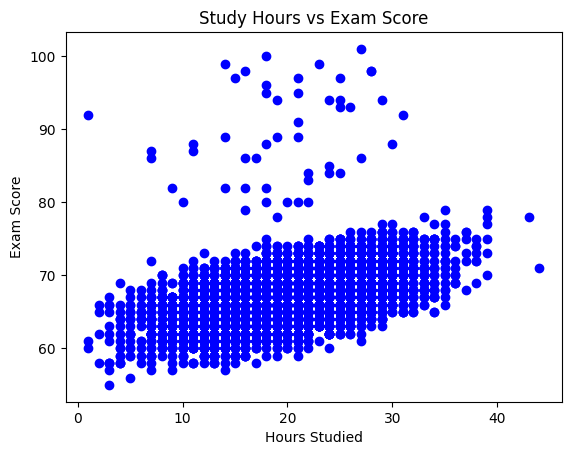

In [ ]:
plt.scatter(df["Hours_Studied"], df["Exam_Score"], color="blue")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Study Hours vs Exam Score")
plt.show()

In [ ]:
X = df[["Hours_Studied"]]
y = df["Exam_Score"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
print("Intercept:", linear_model.intercept_)
print("Coefficient:", linear_model.coef_)

Intercept: 61.42212126722494
Coefficient: [0.2927191]


In [ ]:
y_pred=linear_model.predict(X_test)
r2=r2_score(y_test,y_pred)
print("R-squared:", r2)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:", rmse)

R-squared: 0.21161979575788192
RMSE: 3.223589480967947


In [ ]:
# Example input
Hours_Studied = [[10]]   # 2D array since sklearn expects 2D for features

# Predict using trained linear model
predicted_score = linear_model.predict(Hours_Studied)
print("Predicted Exam Score:", predicted_score[0])

Predicted Exam Score: 64.34931222054067


In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print("Original feature count:", X_train.shape[1])
print("After polynomial expansion:", X_train_poly.shape[1])

Original feature count: 1
After polynomial expansion: 2


In [ ]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluation metrics
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression Evaluation:")
print("RMSE:", rmse_poly)
print("R_squared:", r2_poly)

Polynomial Regression Evaluation:
RMSE: 3.2218275769664184
R_squared: 0.21248136367219017


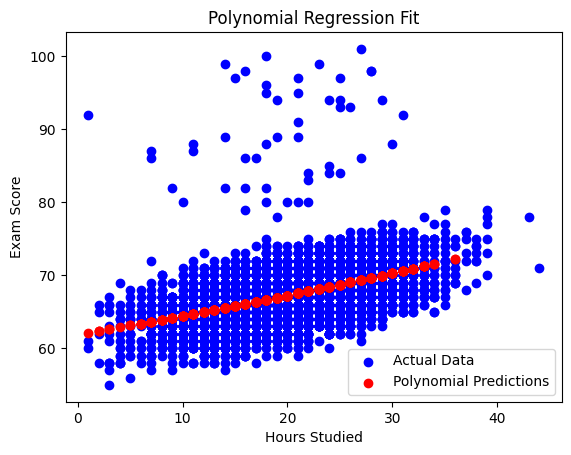

In [ ]:
# Visualization
plt.scatter(X, y, color="blue", label="Actual Data")
plt.scatter(X_test, y_pred_poly, color="red", label="Polynomial Predictions")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.show()